## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

    The number of rows is 294478.

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

    The number of unique users is 290584.


d. The proportion of users converted.

In [5]:
df['converted'].value_counts()


0    259241
1     35237
Name: converted, dtype: int64

In [6]:
proportion_converted = 35237/294478
print(proportion_converted)

0.11965919355605512


In [7]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


    The proportion of users converted is about 11.96 %.

e. The number of times the `new_page` and `treatment` don't line up.

    I am going to extract all the rows where "treatment" is aligned with "old_page" instead of "new_page".

In [8]:
not_aligned_1 = df.query('group == "treatment" and landing_page == "old_page"')

In [9]:
len(not_aligned_1)

1965

    They are not aligned in 1965 cases.

    I am going to extract all the rows where "control" is aligned with "new_page" instead of "old_page".

In [10]:
not_aligned_2 = df.query("group == 'control' and landing_page == 'new_page'")

In [11]:
len(not_aligned_2)

1928

    They are not aligned in 1928 cases.

In [12]:
total_not_aligned = len(not_aligned_1) + len(not_aligned_2)
print(total_not_aligned)

3893


    The total number of unaligned pairs is 3893.

f. Do any of the rows have missing values?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


    There is no missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
df2 = df.query("(group == 'control' and landing_page == 'old_page') or (group == 'treatment' and landing_page == 'new_page')")

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2.shape[0]

290585

In [17]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

    There are 290584 unique user IDs. One differs due to timestamp.

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


    This result shows again that it is the same user ID just differing in timestamp.

c. What is the row information for the repeat **user_id**? 

    The repeat user can be found in lines 1899 and 2893.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [19]:
df2 = df2.drop_duplicates(['user_id'], keep='first')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df2['converted'].mean()

0.11959708724499628

    The probability is about 11.95%.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
df2[df2['group'] == 'control']['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [22]:
df2[df2['group'] == 'treatment']['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [23]:
len(df2.query('landing_page == "new_page"'))/len(df2.landing_page)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

    Null Hypothesis        : new page <=  old page

    Alternative Hypothesis : new page >  old page

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [24]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


    Since old and new are supposed to be equal, we use the whole dataset and obtain a probability of 11.95%.

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [25]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


    Since old and new are supposed to be equal, we use the whole dataset and obtain a probability of 11.95%.

c. What is $n_{new}$?

In [26]:
n_new = len(df2.query("group == 'treatment'"))
print(n_new)

145310


    The sampling size for the new page is found in the "treatment" group.

d. What is $n_{old}$?

In [27]:
n_old = len(df2.query("group == 'control'"))
print(n_old)

145274


    The sampling size for the new page is found in the "control" group.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted = np.random.binomial(1,p_new,n_new)

#picking random choices based on the probability and storing them in new_page_converted.
#using random.binomial so I don't have to specify the available options 0 and 1.
#Then calculating the mean to see the expected amount of success. 

new_page_converted.mean()

0.12040465212304728

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.binomial(1,p_old,n_old)

old_page_converted.mean()

0.11883062351143357

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_converted.mean() - old_page_converted.mean()

0.0015740286116137092

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [31]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new).mean()
    old_page_converted = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([3.000e+00, 8.400e+01, 4.730e+02, 1.756e+03, 3.073e+03, 2.803e+03,
        1.393e+03, 3.600e+02, 5.200e+01, 3.000e+00]),
 array([-4.93029137e-03, -3.92470346e-03, -2.91911554e-03, -1.91352762e-03,
        -9.07939698e-04,  9.76482214e-05,  1.10323614e-03,  2.10882406e-03,
         3.11441198e-03,  4.11999990e-03,  5.12558782e-03]),
 <a list of 10 Patch objects>)

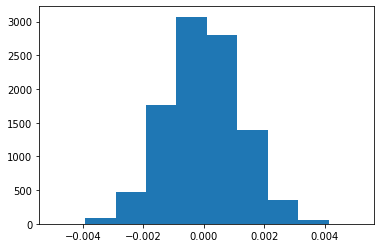

In [32]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
df_control = df2.query('group == "control"')
df_treatment = df2.query('group == "treatment"')

#observed difference
obs_diff = df_treatment.converted.mean() - df_control.converted.mean()
print(obs_diff)

-0.0015782389853555567


In [34]:
#The proportion of the values that are greater than the observed difference
(p_diffs > obs_diff).mean()

0.9055

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

    The computed value is called p value.
    A smaller p value means that there is more evidence that the alternative hypothesis is true.
    In our case the p value is very high which shows that the null hypothesis is true and we reject
    the alternative hypothesis.
    This means the old page performs just as well or even better than the new page and we should keep the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sm

n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))
convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [36]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

    Since the p value is again very large, as in our previous calculations, we have to reject the alternative hypothesis.
    This p value agrees with the previous findings.

    The z-score is around 1.31 less which is below the critical value of about 1.645. 
    This is further evidence to not reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

    In this case we should be using a logistic regression, 
    because we are dealing with probabilities and we have 
    only two possibilities available (conversion or no conversion).
    

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2['intercept']=1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
import statsmodels.api as sm
logit = sm.Logit(df2['converted'],df2[['intercept','treatment']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 17 Aug 2019   Pseudo R-squ.:               8.077e-06
Time:                        15:40:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

    In a logistic regression, the null hypothesis is always 
    that there is no relationship between the x variable and 
    the y variable. But the alternative hypothesis is that 
    there is a dependency.
    
    The p-value associated with ab_page is about 0.19. 
    It is higher than 0.05. Thus, the coefficient is not significant.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

    A lot of factors can influence our results, like for example 
    the user's country, the time of the year, 
    the economic situation of a country or user, and so on.
    Adding new values might improve or worsen the result 
    depending on the quality of the data.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
countries_df = pd.read_csv('./countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [50]:
# Creating the necessary dummy variables

df_new[['CA', 'US']] = pd.get_dummies(df_new['country'])[['CA','US']]

df_new['country'].astype(str).value_counts()


US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [51]:
#create column ab_page
df_new = df_new.rename(columns={'treatment': 'ab_page'})

In [49]:
df_new.head()


,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,0


In [59]:
logit_g = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'US']])

logit_g.fit().summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 17 Aug 2019   Pseudo R-squ.:               2.323e-05
Time:                        16:21:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [66]:
df_final = df_new
df_final['US_interact_ab_page'] = df_final['US']*df_final['ab_page']
df_final['CA_interact_ab_page'] = df_final['CA']*df_final['ab_page']
logit_h = sm.Logit(df_final['converted'], df_final[['intercept', 'ab_page', 'US', 'CA', 'US_interact_ab_page', 'CA_interact_ab_page']])
                                                    
logit_h.fit().summary()                                                    

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sat, 17 Aug 2019   Pseudo R-squ.:               3.482e-05
Time:                        16:39:47   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept              -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page                 0.0108      0.023      0.475      0.635      -0.034       0.056
US                      0.0057      0.019      0.306      0.760      -0.031       0.043
CA                     -0.0118      0.040     -0.296      0.767      -0.090       0.066
US_interact_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
CA_interact_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
=======================================================================================
"""

    
    We are using logistic regression, because we are dealing 
    with probabilities.
    Under the abbreviation LLR p-value we can see the p-value.
    All the p-values, after adding the countries, are higher 
    than the threshold 0.05 used as cut-off for 
    significance. So the coefficients are not considered 
    (statistically) significant. This means a significant 
    difference to the null hypothesis does not exist. 
    In conclusion it means that none of the changes are evidence 
    for higher conversion rates, neither an introduction of 
    the new page, nor a new calculation considering the 
    country information.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

additional sources:



    https://jamesrledoux.com/code/drop_duplicates
    
    https://stattrek.com/regression/slope-test.aspx

    https://study.com/academy/lesson/finding-z-scores-definition-examples-lesson-quiz.html
    
    https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/
    
    https://www.statsmodels.org/stable/regression.html

    https://datatofish.com/statsmodels-linear-regression

    http://efavdb.com/interpret-linear-regression/
    
    https://datascienceplus.com/multiple-logistic-regression-in-python/
    
    https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
    
    https://mashimo.wordpress.com/2017/07/26/logistic-regression-with-python-statsmodels/
    
    http://blog.yhat.com/posts/logistic-regression-and-python.html
    
    https://blog.minitab.com/blog/understanding-statistics/what-can-you-say-when-your-p-value-is-greater-than-005

    https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients
    
    https://en.wikipedia.org/wiki/Logistic_regression